### Algoritmos de clasificacion con la base de datos ENDUTIH

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #para clasificar los datos
import sklearn as sk #para normalizar los datos
import seaborn as sns
from sklearn import tree

In [35]:
path1= 'C:/Users/alejandro/Desktop/ProyectoFinal Delfin/Limpiados/tr_vivienda.csv'
df_Vivienda=pd.read_csv(path1,low_memory=False,index_col=0)

In [36]:
df_vivienda.head()

,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,RESUL_V,CD_ENDUTIH,DOMINIO,ENT
UPM,,,,,,,,,,,,,,
100008,1,3,1,1,1,1,1,4,1,1,1,14,U,1
100008,2,3,1,1,1,1,1,4,1,1,1,14,U,1
100008,3,3,1,1,1,1,1,2,1,1,1,14,U,1
100008,4,3,1,1,1,1,2,4,2,4,1,14,U,1
100010,1,3,1,1,1,1,1,3,1,1,1,14,U,1


In [59]:
df_vivienda_copy=df_Vivienda.copy()
df_vivienda_copy=df_vivienda_copy.drop('DOMINIO',axis=1)

In [60]:
df_vivienda_copy

,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,RESUL_V,CD_ENDUTIH,ENT
UPM,,,,,,,,,,,,,
100008,1,3,1,1,1,1,1,4,1,1,1,14,1
100008,2,3,1,1,1,1,1,4,1,1,1,14,1
100008,3,3,1,1,1,1,1,2,1,1,1,14,1
100008,4,3,1,1,1,1,2,4,2,4,1,14,1
100010,1,3,1,1,1,1,1,3,1,1,1,14,1
100010,2,3,1,1,1,1,1,2,1,1,1,14,1
100010,3,3,1,1,1,1,1,1,1,1,1,14,1
100010,4,3,1,1,1,1,1,3,1,1,1,14,1
100010,5,3,1,1,1,1,1,3,1,1,1,14,1


In [61]:
df_vivienda_copy = sk.preprocessing.normalize(df_vivienda_copy)

In [62]:
print(np.unique(clusters.fit_predict(df_vivienda_copy)))

[0 1 2]


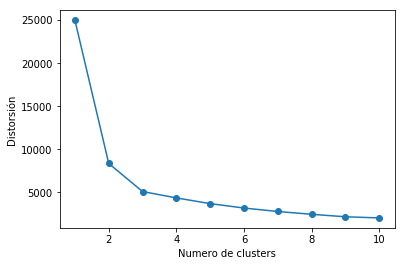

In [63]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                random_state=0)
    km.fit(df_vivienda_copy)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorsión')
plt.show()

In [64]:
clusters = KMeans(n_clusters=3,
                    init='k-means++', 
                    max_iter=300,
                    tol=1e-04,
                    n_init=10,
                    random_state=0) 

y_km = clusters.fit_predict(df_vivienda_copy)
y_km

array([0, 0, 0, ..., 0, 0, 0])

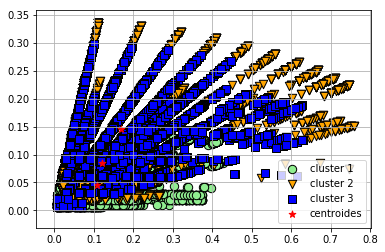

In [65]:
plt.scatter(df_vivienda_copy[y_km==0,0],
          df_vivienda_copy[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(df_vivienda_copy[y_km==1,0],
          df_vivienda_copy[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(df_vivienda_copy[y_km==2,0],
          df_vivienda_copy[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()